# importing libraries and setting options

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Gathering step

In [2]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#downloads image_predictions.tsv from udacity programmatically 

r = requests.get(image_predictions_url)
with open(os.path.join(image_predictions_url.split('/')[-1]).replace('-','_'), mode = 'wb') as file:
    file.write(r.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv' )
tweets_stats= pd.read_json('tweet_json.txt' ,lines = True, encoding = 'utf-8')
#for coloumn in tweets_stats: tweets_stats.drop(column) if coloumn not in ['retweet_count', 'favorite_count', ]

In [65]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

## Assessing the data

In [5]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_predictions.query('p1_dog < p2_dog') #sometimes p1 brings up the wrong value but p2 doesnt

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True


In [7]:
image_predictions.query('p2_dog < p3_dog') #sometimes p2 brings up the wrong value but p3 doesnt

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,0.104152,True
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,0.165914,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,Chihuahua,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [8]:
image_predictions.query('p1_dog == False') #sometimes the picture isnt a dog at all

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [9]:
image_predictions.query('img_num>1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predictions.tweet_id.sort_values() 

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [12]:
image_predictions.duplicated().sum()

#no duplicated

0

In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.query('doggo != "None" and(floofer != "None" or pupper != "None" or puppo != "None")').head()

# doggo can appear with any of floofer, pupper and puppo 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None


In [15]:
twitter_archive.query('rating_denominator != 10').tail().T

#wrong values get picked up in denominator and numerator

,1662,1663,1779,1843,2335
tweet_id,682962037429899265,682808988178739200,677716515794329600,675853064436391936,666287406224695296
in_reply_to_status_id,NaN,682788441537560576.0,NaN,NaN,NaN
in_reply_to_user_id,NaN,4196983835.0,NaN,NaN,NaN
timestamp,2016-01-01 16:30:13 +0000,2016-01-01 06:22:03 +0000,2015-12-18 05:06:23 +0000,2015-12-13 01:41:41 +0000,2015-11-16 16:11:11 +0000
source,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
text,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
retweeted_status_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/682962037429899265/photo/1,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",https://twitter.com/dog_rates/status/666287406224695296/photo/1


In [16]:
twitter_archive.query('rating_numerator == 0')

#tweet id 835152434251116546 is WeRateDogs fighting with another user needs to get cleaned

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
tweets_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
tweets_stats[['id', 'favorite_count', 'retweet_count']]

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Notes
#### `image_predicitions` table: 
- p : predicition 
- conf : confidence

## Quality issues

#### `image_predicitions` table :
- sometimes p1 brings up the wrong value while p2 doesnt and sometimes p1 and p2 are wrong values while p2 is the right one
- redundant data like p*_conf

#### `twitter_archive` table:
- tweet id 835152434251116546 is WeRateDogs fighting with another user.
- time_stamp is string instead of date time
- None is used when no value exist.
- in_reply_to tweets are redundant.
- outliers in rating_denominator due to many dogs in the picture which is ok or the program picking up the wrong rating for example in twitter ID = 666287406224695296 the program picked up "1/2 legged dog" as 1/2 rating which is false.
- when any of retweeted_status_id, retweeted_status_user_id, in_reply_to_user_id, in_reply_to_status_id exist it means that we are looking at a retweet where retweets are redundant.
- redundant data like the retweeted columns and source.
-  rating_denominator and rating_numerator are useless in the current format.
- time stamp is too detailed
#### `tweets_stats` table:
- only 3 useful columns: id, favorite_count, retweet_count, rest are redundant.
- the retweet count and favorite count can be improved.

## Tideness issues
- too many data sets to work with

#### `tweet_stats` table:
- id column name is different than that of the other two tables (tweet_id)

#### `twitter_archive` table:

- each of columns doggo, floofer, pupper and puppo has the value in the coloumn header, as there are few cases were more than one of them exist in a single row

## Cleaning the data

In [20]:
image_predictions_clean =  image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()
tweets_stats_clean = tweets_stats.copy()

#### `tweets_stats`: only 3 useful columns: id, favorite_count, retweet_count
##### Define
reassign the useful columns to the dataframe leaving the less redundant data behind

##### code and test

In [21]:
tweets_stats_clean = tweets_stats_clean[['id', 'favorite_count', 'retweet_count' ]]

tweets_stats_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


`tweet_stats` table:
- the retweet count and favorite count can be improved.

#### Define :
- create a new column called total_engagements that is the sum of fav and retweet counts and then delete the now useless columns

#### code

In [22]:

print(tweets_stats_clean.insert(3, 'total_engagements',
                                   tweets_stats_clean.favorite_count + tweets_stats_clean.retweet_count))

None


In [23]:
tweets_stats_clean.head()

,id,favorite_count,retweet_count,total_engagements
0,892420643555336193,39467,8853,48320
1,892177421306343426,33819,6514,40333
2,891815181378084864,25461,4328,29789
3,891689557279858688,42908,8964,51872
4,891327558926688256,41048,9774,50822


###### `twitter_archive` : None is used when no value exist.

##### Define
Change all 'None' values to NaN

##### code

In [24]:
twitter_archive_clean = twitter_archive_clean.replace('None', np.nan)

##### testing 

In [25]:
print(twitter_archive.info(), twitter_archive_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### correcting incorrect data type

###### `twitter_archive` : 
- time_stamp is string instead of date time

##### Define
change time_stamp to datetime

##### code and test

In [26]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].astype('datetime64[ns]')

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

###### `twitter_archive` : 
- when any of retweeted_status_id, retweeted_status_user_id, in_reply_to_user_id, in_reply_to_status_id exist it means that we are looking at a retweet where retweets are redundant.
- in_reply_to tweets are redundant.
##### Define
drop all retweets and replies.

##### code

In [27]:
tobedropped_index = twitter_archive_clean.retweeted_status_id.dropna().index
twitter_archive_clean.drop(index = list(tobedropped_index), inplace = True)
tobedropped_index = twitter_archive_clean.in_reply_to_status_id.dropna().index
twitter_archive_clean.drop(index = list(tobedropped_index), inplace = True)

#### test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

###### `twitter_archive` : 
- tweet id 835152434251116546 is WeRateDogs fighting with another user.
- some of the values in are wrong rating_denominatorthe program picking up the wrong values.
##### Define
since the wrong values are few, find the incorrect values manually then fix them.

##### code and tests

In [29]:
twitter_archive_clean.query('rating_denominator != 10')  #before correcting the values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,NaN,NaN,NaN,NaN,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know

In [30]:
corrected_values ={ 740373189193256964:[14,10]
                   ,722974582966214656:[13,10]
                   ,716439118184652801:[11,10]
                   ,682962037429899265:[10,10]
                   ,666287406224695296:[9,10] }



for id in corrected_values :
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==id , 'rating_numerator' ] = corrected_values[id][0]
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==id , 'rating_denominator' ] = corrected_values[id][1] 

#### test

In [31]:
#twitter_archive_clean[twitter_archive_clean.tweet_id == list(corrected_values.keys())]
for id in list(corrected_values.keys()) :
    print(twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == id ][['rating_numerator','rating_denominator']])


      rating_numerator  rating_denominator
1068                14                  10
      rating_numerator  rating_denominator
1165                13                  10
      rating_numerator  rating_denominator
1202                11                  10
      rating_numerator  rating_denominator
1662                10                  10
      rating_numerator  rating_denominator
2335                 9                  10


#### `twitter_archive` :
- redundant data like the retweeted columns and source.
#### Define
- find which columns are redundant then remove them

#### code and test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

In [33]:
redundant_columns = ['in_reply_to_status_id','in_reply_to_user_id',
                     'source', 'expanded_urls',   
                     'retweeted_status_id','retweeted_status_user_id',
                    'retweeted_status_timestamp','text'
                    ]
twitter_archive_clean.drop(columns = redundant_columns, inplace = True)
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   rating_numerator    2097 non-null   int64         
 3   rating_denominator  2097 non-null   int64         
 4   name                1494 non-null   object        
 5   doggo               83 non-null     object        
 6   floofer             10 non-null     object        
 7   pupper              230 non-null    object        
 8   puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


`twitter_archive` table:
- rating_denominator and rating_numerator are useless in the current format

#### Define : 
- creating a new column called rating with an object type float and it will be the result of dividing rating_numerator and rating_denominator , then drop the now useless ratings columns

#### code

In [35]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### test

In [36]:
twitter_archive_clean.head()

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,NaN,NaN,NaN,1.2


#### `twitter_archive` table:
- time stamp is too detailed

#### Define 
- make a new column called date which has only the year-month data of the dates to eliminate further noise in the visualization step and extract date only from timestamp and then delete timestamp

#### code

In [37]:
#twitter_archive_clean.drop(columns='timestamp', inplace = True)
twitter_archive_clean['date'] = twitter_archive_clean.timestamp.dt.to_period('M')

#### test

In [38]:
twitter_archive_clean.head()
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   2097 non-null   int64         
 1   timestamp  2097 non-null   datetime64[ns]
 2   name       1494 non-null   object        
 3   doggo      83 non-null     object        
 4   floofer    10 non-null     object        
 5   pupper     230 non-null    object        
 6   puppo      24 non-null     object        
 7   rating     2097 non-null   float64       
 8   date       2097 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(5), period[M](1)
memory usage: 163.8+ KB


#### `image_predicitions` table :
- redundant data like p*_conf
- sometimes p1 brings up the wrong value while p2 doesnt and sometimes p1 and p2 are wrong values while p2 is the right one
#### Define:
- remove redundant data first
- make a new p_dog table , and put the correct p values in it , for example if p1_dog value is false and p2_dog is right, put p2 as the data in new coloumn and if all of p1, p2 and p3 are false then drop that row
- then remove now redundant data (all columns except tweet_id)

#### code

In [39]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [40]:
redundant_columns = ['jpg_url', 'img_num', 'p1_conf','p2_conf', 'p3_conf' ]
image_predictions_clean.drop(columns = redundant_columns, inplace = True)

#### test

In [41]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   p1        2075 non-null   object
 2   p1_dog    2075 non-null   bool  
 3   p2        2075 non-null   object
 4   p2_dog    2075 non-null   bool  
 5   p3        2075 non-null   object
 6   p3_dog    2075 non-null   bool  
dtypes: bool(3), int64(1), object(3)
memory usage: 71.0+ KB


#### now the second part, 
- make a new p_dog table , and put the correct p values in it , for example if p1_dog value is false and p2_dog is right, put p2 as the data in new coloumn and if all of p1, p2 and p3 are false then drop that row

##### code

In [42]:
image_predictions_clean.head(2)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,666020888022790149,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True
1,666029285002620928,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True


In [43]:
p = []
tobedropped_index = []

for i in image_predictions_clean.index:
    if image_predictions_clean.iloc[i].p1_dog:
        p += [image_predictions_clean.iloc[i].p1]
    elif image_predictions_clean.iloc[i].p2_dog:
        p += [image_predictions_clean.iloc[i].p2]
    elif image_predictions_clean.iloc[i].p3_dog:    
        p += [image_predictions_clean.iloc[i].p3]
    else:
        tobedropped_index += [i]
        
image_predictions_clean.drop(index = tobedropped_index, inplace = True)   
image_predictions_clean.insert(2, "dog_type", p, False) 

##### test

In [44]:
print(len(image_predictions) -len(tobedropped_index), len(p),len(image_predictions_clean))
print(type(tobedropped_index))
image_predictions_clean.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False) ')

1751 1751 1751
<class 'list'>


,tweet_id,p1,dog_type,p1_dog,p2,p2_dog,p3,p3_dog


#### and finally getting rid of the now redundant data

##### code and test

In [45]:
image_predictions_clean.columns

Index(['tweet_id', 'p1', 'dog_type', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'], dtype='object')

In [46]:
image_predictions_clean.drop(columns=['p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'],inplace= True)

image_predictions_clean

,tweet_id,dog_type
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
2069,891087950875897856,Chesapeake_Bay_retriever
2070,891327558926688256,basset
2071,891689557279858688,Labrador_retriever
2072,891815181378084864,Chihuahua


# Tidning the data

#### `tweet_stats` table:
- id column name is different than that of the other two tables (tweet_id)

#### Define
change id column name to `tweet_id`

#### code and test

In [47]:
tweets_stats_clean.rename(columns={"id": "tweet_id"}, inplace = True)

#### `twitter_archive` table:

- each of columns doggo, floofer, pupper and puppo has the value in the coloumn header, as there are few cases were more than one of them exist in a single row.

#### Define
combine all of them in a single columns -- `nicktype` -- where if the dog had more than one value in nicktype columns, they will be added with an underscore between the two nicktypes (eg. doggo_pupper)

#### code 

In [48]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating,date
641,793226087023144960,2016-10-31 23:00:11,Juno,NaN,NaN,NaN,NaN,1.1,2016-10
1594,686377065986265092,2016-01-11 02:40:19,Birf,NaN,NaN,pupper,NaN,1.0,2016-01
278,840268004936019968,2017-03-10 18:27:58,Monty,NaN,NaN,NaN,NaN,1.2,2017-03


In [49]:
twitter_archive_clean['nicktype'] = (twitter_archive_clean['doggo'].astype(str) + '-'
                                     + twitter_archive_clean['floofer'].astype(str) + '-'
                                     + twitter_archive_clean['pupper'].astype(str) + '-'
                                     + twitter_archive_clean['puppo'].astype(str)
                                    ).str.replace('nan','').str.replace('--' ,'-').str.strip('-').str.replace('--' ,'-')

twitter_archive_clean.replace('', np.nan, inplace= True)
twitter_archive_clean.drop(columns=['doggo' , 'floofer', 'pupper', 'puppo'], inplace =True)

#### test

In [50]:
print(twitter_archive_clean.nicktype.value_counts(), twitter_archive_clean.info()) 

twitter_archive_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   2097 non-null   int64         
 1   timestamp  2097 non-null   datetime64[ns]
 2   name       1494 non-null   object        
 3   rating     2097 non-null   float64       
 4   date       2097 non-null   period[M]     
 5   nicktype   336 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2), period[M](1)
memory usage: 114.7+ KB
pupper           221
doggo             72
puppo             23
doggo-pupper       9
floofer            9
doggo-puppo        1
doggo-floofer      1
Name: nicktype, dtype: int64 None


,tweet_id,timestamp,name,rating,date,nicktype
0,892420643555336193,2017-08-01 16:23:56,Phineas,1.3,2017-08,NaN
1,892177421306343426,2017-08-01 00:17:27,Tilly,1.3,2017-08,NaN
2,891815181378084864,2017-07-31 00:18:03,Archie,1.2,2017-07,NaN
3,891689557279858688,2017-07-30 15:58:51,Darla,1.3,2017-07,NaN
4,891327558926688256,2017-07-29 16:00:24,Franklin,1.2,2017-07,NaN


#### General :
- too many data sets to work with

#### Define :
- combine all dataframes into a master dataframe

#### code

In [51]:
master_df = pd.merge(tweets_stats_clean,twitter_archive_clean)
master_df = master_df.merge(image_predictions_clean)

#### test

In [52]:
master_df.head()

,tweet_id,favorite_count,retweet_count,total_engagements,timestamp,name,rating,date,nicktype,dog_type
0,892177421306343426,33819,6514,40333,2017-08-01 00:17:27,Tilly,1.3,2017-08,NaN,Chihuahua
1,891815181378084864,25461,4328,29789,2017-07-31 00:18:03,Archie,1.2,2017-07,NaN,Chihuahua
2,891689557279858688,42908,8964,51872,2017-07-30 15:58:51,Darla,1.3,2017-07,NaN,Labrador_retriever
3,891327558926688256,41048,9774,50822,2017-07-29 16:00:24,Franklin,1.2,2017-07,NaN,basset
4,891087950875897856,20562,3261,23823,2017-07-29 00:08:17,NaN,1.3,2017-07,NaN,Chesapeake_Bay_retriever


# Visualizations :- 

## most common dog names:-

In [53]:
top_names = master_df.name.value_counts().sort_values(ascending = False).iloc[1:21]
# first name was 'a' so i used [1:21] in iloc to ignore it, and i would like to think that "the" is a legit name.

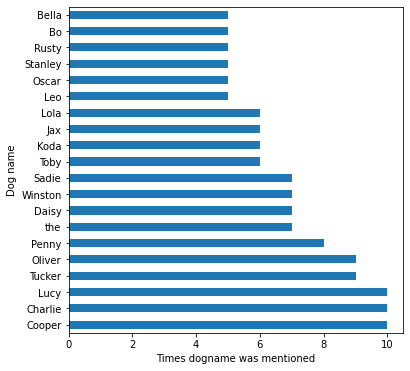

In [69]:
top_names.plot.barh(figsize=(6,6), );
pyplot.xlabel('Times dogname was mentioned')
pyplot.ylabel('Dog name');

## to find how legit the engagements row is , we have to see if retweets and likes correlate, so heres the graph

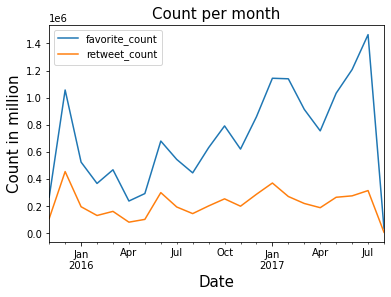

In [70]:
master_df[['date','favorite_count','retweet_count']].groupby(['date']).sum().plot()
pyplot.xlabel('Date',fontsize= 15)
pyplot.ylabel('Count in million',fontsize= 15)
pyplot.title('Count per month', fontsize = 15);

### <font color='blue'> answer : they coorelate so we can use the total engagements row in our stats</font>

In [56]:
master_df.head()

,tweet_id,favorite_count,retweet_count,total_engagements,timestamp,name,rating,date,nicktype,dog_type
0,892177421306343426,33819,6514,40333,2017-08-01 00:17:27,Tilly,1.3,2017-08,NaN,Chihuahua
1,891815181378084864,25461,4328,29789,2017-07-31 00:18:03,Archie,1.2,2017-07,NaN,Chihuahua
2,891689557279858688,42908,8964,51872,2017-07-30 15:58:51,Darla,1.3,2017-07,NaN,Labrador_retriever
3,891327558926688256,41048,9774,50822,2017-07-29 16:00:24,Franklin,1.2,2017-07,NaN,basset
4,891087950875897856,20562,3261,23823,2017-07-29 00:08:17,NaN,1.3,2017-07,NaN,Chesapeake_Bay_retriever


## Most prefered dog types for followers vs most rated dog types.

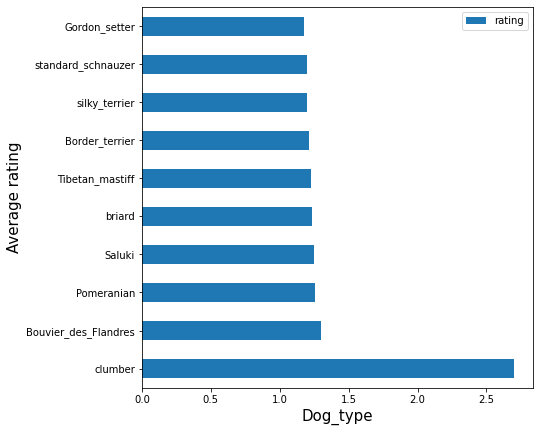

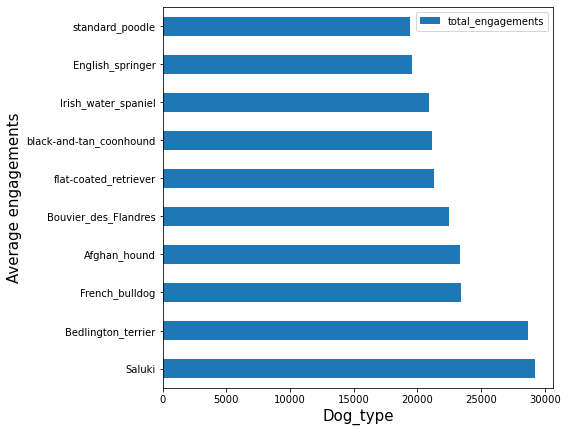

In [57]:
master_df[['dog_type','rating']].groupby(['dog_type']
).mean().sort_values(ascending = False, by='rating').iloc[:10].plot.barh(figsize =(7,7) )
pyplot.xlabel('Dog_type',fontsize= 15)
pyplot.ylabel('Average rating',fontsize= 15)

master_df[['dog_type','total_engagements']].groupby(['dog_type']
).mean().sort_values(ascending = False, by='total_engagements').iloc[:10].plot.barh(figsize =(7,7) )
pyplot.xlabel('Dog_type',fontsize= 15)
pyplot.ylabel('Average engagements',fontsize= 15);


### <font color='blue'> What does this mean?
- WeRateDogs'ratings is based off the photo's quality instead of the popular opinion (or they just have different preferences). 
- If u have a saluki dog you are more likely to gain attention off the internet.
<font>

## And finally a boxplot of nicktypes (doggo and stuff) to know the most rated nicktypes

In [58]:
master_df.nicktype.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

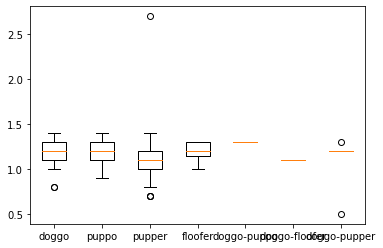

In [59]:
t = []
t_labels = []

for value in [ 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo','doggo-floofer', 'doggo-pupper']:
    t += [master_df.loc[master_df['nicktype']==value, 'rating' ].values]
    t_labels += [value]
    
pyplot.boxplot(t, labels = t_labels);

### <font color='blue'> answer : doggo-pupper combo is the most rated but the data is low on combos so, the most rated non combo is doggo, puppo and floofer</font>

# Saving the master dataframe to a csv

In [63]:
master_df.to_csv('master_dataframe.csv',index = False)